In [3]:
import matplotlib
import numpy as np
from matplotlib import pyplot as pl
%matplotlib inline
from astropy.io import ascii
from astropy.table import Table,Column,Row

In [4]:
tbl=ascii.read('NebraAp2.txt')
print tbl

TARGET     RA      DEC    ...   SKY   SKYERR                IMAGE               
------ --------- -------- ... ------- ------ -----------------------------------
 nebra 203.81317 41.00438 ... -0.0015 0.0296 nebra_f105w_e02-e90_sub_masked.fits
 nebra 203.81317 41.00438 ... -0.0015 0.0296 nebra_f105w_e02-e90_sub_masked.fits
 nebra 203.81317 41.00438 ... -0.0015 0.0296 nebra_f105w_e02-e90_sub_masked.fits
 nebra 203.81317 41.00438 ...  0.0011 0.0281 nebra_f105w_e05-e90_sub_masked.fits
 nebra 203.81317 41.00438 ...  0.0011 0.0281 nebra_f105w_e05-e90_sub_masked.fits
 nebra 203.81317 41.00438 ...  0.0011 0.0281 nebra_f105w_e05-e90_sub_masked.fits
 nebra 203.81317 41.00438 ... -0.0065  0.041 nebra_f125w_e02-e90_sub_masked.fits
 nebra 203.81317 41.00438 ... -0.0065  0.041 nebra_f125w_e02-e90_sub_masked.fits
 nebra 203.81317 41.00438 ... -0.0065  0.041 nebra_f125w_e02-e90_sub_masked.fits
 nebra 203.81317 41.00438 ... -0.0014 0.0238 nebra_f125w_e03-e90_sub_masked.fits
   ...       ...      ... ..

In [5]:
F105W=tbl[tbl['FILTER']=='F105W']
F125W=tbl[tbl['FILTER']=='F125W']
F160W=tbl[tbl['FILTER']=='F160W']
F140W=tbl[tbl['FILTER']=='F140W']

In [6]:
#Group up data into smaller tables based on how you want to plot it. Usually you would want to divide up filters and apertures,seen below
#There are definitely ways to automate this so if you know how, feel free but I have been brute forcing it 

In [7]:
F105W01=F105W[F105W['APER']==0.1]
F105W02=F105W[F105W['APER']==0.2]
F105W03=F105W[F105W['APER']==0.3]
F125W01=F125W[F125W['APER']==0.1]
F125W02=F125W[F125W['APER']==0.2]
F125W03=F125W[F125W['APER']==0.3]
F140W01=F140W[F140W['APER']==0.1]
F140W02=F140W[F140W['APER']==0.2]
F140W03=F140W[F140W['APER']==0.3]
F160W01=F160W[F160W['APER']==0.1]
F160W02=F160W[F160W['APER']==0.2]
F160W03=F160W[F160W['APER']==0.3]

In [8]:
#For whatever reason it does not recognize =='inf' as an aperture size so it will not able able to separate PSF data this way
#In a few lines I will introduce the PSF data in a separate table 

/Users/annahaynie/anaconda2/envs/astro2A/lib/python2.7/site-packages/matplotlib/axes/_axes.py:2748: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


<Container object of 3 artists>

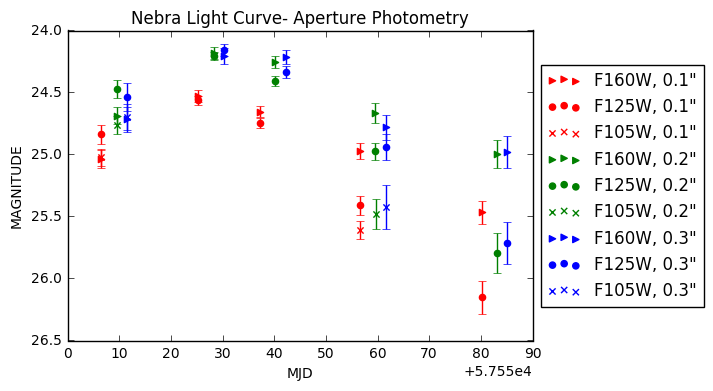

In [9]:
pl.scatter(F160W01["MJD"], F160W01["MAG"], color='r', marker='>', label='F160W, 0.1"')
pl.scatter(F125W01["MJD"], F125W01["MAG"], color='r', marker='o', label='F125W, 0.1"')
pl.scatter(F105W01["MJD"], F105W01["MAG"], color='r', marker='x', label='F105W, 0.1"')
pl.gca().invert_yaxis()

pl.scatter(F160W02["MJD"]+3, F160W02["MAG"], color='g', marker='>', label='F160W, 0.2"')
pl.scatter(F125W02["MJD"]+3, F125W02["MAG"], color='g', marker='o', label='F125W, 0.2"')
pl.scatter(F105W02["MJD"]+3, F105W02["MAG"], color='g', marker='x', label='F105W, 0.2"')

pl.scatter(F160W03["MJD"]+5, F160W03["MAG"], color='b', marker='>', label='F160W, 0.3"')
pl.scatter(F125W03["MJD"]+5, F125W03["MAG"], color='b', marker='o', label='F125W, 0.3"')
pl.scatter(F105W03["MJD"]+5, F105W03["MAG"], color='b', marker='x', label='F105W, 0.3"')
pl.xlabel("MJD")
pl.ylabel("MAGNITUDE")
pl.title("Nebra Light Curve- Aperture Photometry")
pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))

pl.errorbar(x=F160W03['MJD']+5, y=F160W03['MAG'], xerr=None, yerr=F160W03['MAGERR'], fmt=None, ecolor='b')
pl.errorbar(x=F125W03['MJD']+5, y=F125W03['MAG'], xerr=None, yerr=F125W03['MAGERR'], fmt=None, ecolor='b')
pl.errorbar(x=F105W03['MJD']+5, y=F105W03['MAG'], xerr=None, yerr=F105W03['MAGERR'], fmt=None, ecolor='b')
pl.errorbar(x=F160W01['MJD'], y=F160W01['MAG'], xerr=None, yerr=F160W01['MAGERR'], fmt=None, ecolor='r')
pl.errorbar(x=F125W01['MJD'], y=F125W01['MAG'], xerr=None, yerr=F125W01['MAGERR'], fmt=None, ecolor='r')
pl.errorbar(x=F105W01['MJD'], y=F105W01['MAG'], xerr=None, yerr=F105W01['MAGERR'], fmt=None, ecolor='r')
pl.errorbar(x=F160W02['MJD']+3, y=F160W02['MAG'], xerr=None, yerr=F160W02['MAGERR'], fmt=None, ecolor='g')
pl.errorbar(x=F125W02['MJD']+3, y=F125W02['MAG'], xerr=None, yerr=F125W02['MAGERR'], fmt=None, ecolor='g')
pl.errorbar(x=F105W02['MJD']+3, y=F105W02['MAG'], xerr=None, yerr=F105W02['MAGERR'], fmt=None, ecolor='g')

In [10]:
#Plot your light curve 
#shifted slightly to make it easier to read 

In [11]:
tbl2=ascii.read('NebraPSF2.txt')
print tbl2

TARGET     RA      DEC    ...   SKY   SKYERR                IMAGE               
------ --------- -------- ... ------- ------ -----------------------------------
 nebra 203.81317 41.00438 ... -0.0015 0.0296 nebra_f105w_e02-e90_sub_masked.fits
 nebra 203.81317 41.00438 ...  0.0011 0.0281 nebra_f105w_e05-e90_sub_masked.fits
 nebra 203.81317 41.00438 ... -0.0065  0.041 nebra_f125w_e02-e90_sub_masked.fits
 nebra 203.81317 41.00438 ... -0.0014 0.0238 nebra_f125w_e03-e90_sub_masked.fits
 nebra 203.81317 41.00438 ... -0.0003 0.0206 nebra_f125w_e04-e90_sub_masked.fits
 nebra 203.81317 41.00438 ... -0.0015 0.0239 nebra_f125w_e05-e90_sub_masked.fits
 nebra 203.81317 41.00438 ... -0.0019 0.0222 nebra_f125w_e06-e90_sub_masked.fits
 nebra 203.81317 41.00438 ... -0.0017 0.0207 nebra_f160w_e02-e90_sub_masked.fits
 nebra 203.81317 41.00438 ... -0.0026 0.0245 nebra_f160w_e03-e90_sub_masked.fits
 nebra 203.81317 41.00438 ... -0.0015 0.0206 nebra_f160w_e04-e90_sub_masked.fits
 nebra 203.81317 41.00438 ..

In [12]:
#Here is the PSF data, follow same procedure as above 

In [13]:
F105WA=tbl2[tbl2['FILTER']=='F105W']
F125WA=tbl2[tbl2['FILTER']=='F125W']
F160WA=tbl2[tbl2['FILTER']=='F160W']
F140WA=tbl2[tbl2['FILTER']=='F140W']

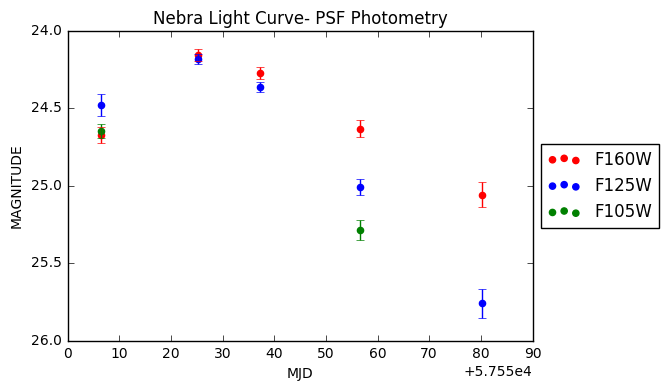

In [14]:
pl.scatter(F160WA["MJD"], F160WA["MAG"], color='r', label='F160W')
pl.scatter(F125WA["MJD"], F125WA["MAG"], color='b', label='F125W')
pl.scatter(F105WA["MJD"], F105WA["MAG"], color='g', label='F105W')
pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.errorbar(x=F160WA['MJD'], y=F160WA['MAG'], xerr=None, yerr=F160WA['MAGERR'], fmt=None, ecolor='r')
pl.errorbar(x=F125WA['MJD'], y=F125WA['MAG'], xerr=None, yerr=F125WA['MAGERR'], fmt=None, ecolor='b')
pl.errorbar(x=F105WA['MJD'], y=F105WA['MAG'], xerr=None, yerr=F105WA['MAGERR'], fmt=None, ecolor='g')
pl.gca().invert_yaxis()
pl.xlabel("MJD")
pl.ylabel("MAGNITUDE")
pl.title("Nebra Light Curve- PSF Photometry")

In [15]:
data01=tbl[tbl['APER']==0.1]
data02=tbl[tbl['APER']==0.2]
data03=tbl[tbl['APER']==0.3]
datapsf=tbl2

In [16]:
#Now we group up all alike apertures because SNCosmos can take in multiple filters at once but not multiple apertures

In [17]:
data01.write('data01.txt',format='ascii.fixed_width')
data02.write('data02.txt',format='ascii.fixed_width')
data03.write('data03.txt',format='ascii.fixed_width')
datapsf.write('datapsf.txt',format='ascii.fixed_width')

In [18]:
#Creating tables for SNCosmo to read 

In [19]:
import sncosmo
model=sncosmo.Model(source='salt2')

In [20]:
#specify salt2 model for type Ia supernovae

In [21]:
data1= sncosmo.read_lc("data01.txt")
data2= sncosmo.read_lc("data02.txt")
data3= sncosmo.read_lc("data03.txt")
datap= sncosmo.read_lc("datapsf.txt")

In [22]:
#Have SNCosmo read in your data

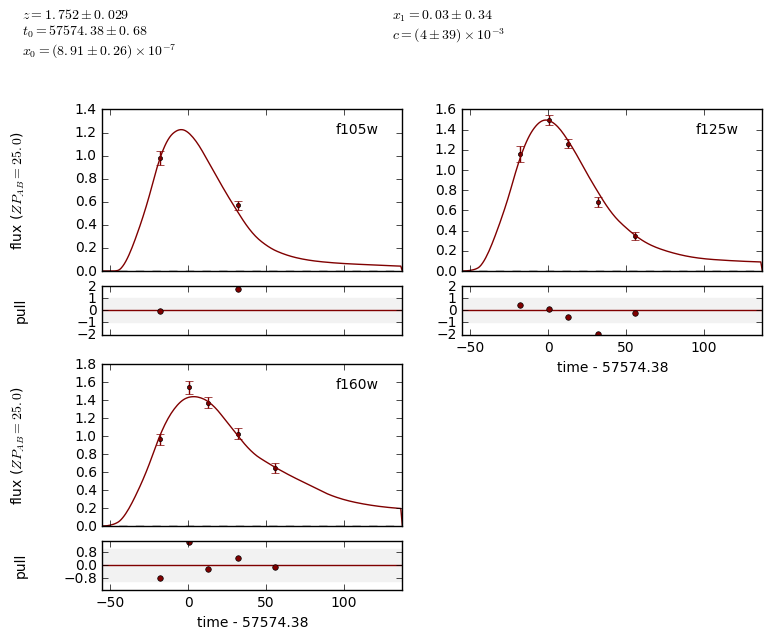

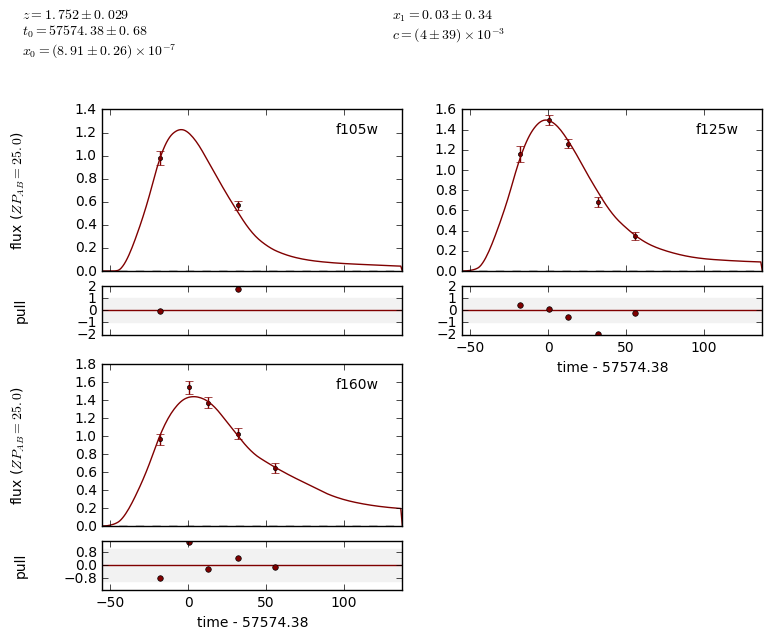

In [23]:
res1,fit1=sncosmo.fit_lc(data1,model,['z','t0', 'x0', 'x1', 'c'], bounds={'z':(1.3,2.2)})
sncosmo.plot_lc(data1,model=fit1, errors=res1.errors)

In [24]:
#The sncosmo program will output estimates for the parameters specified
#The bounds specified give a reference point for the code to estimate the redshift
#Here the bounds are the 95% confidence region for the host galaxy 

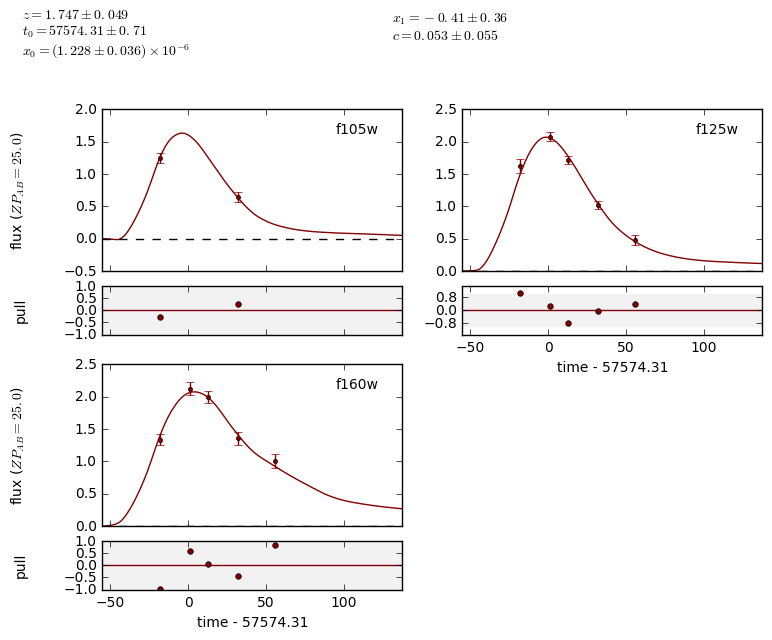

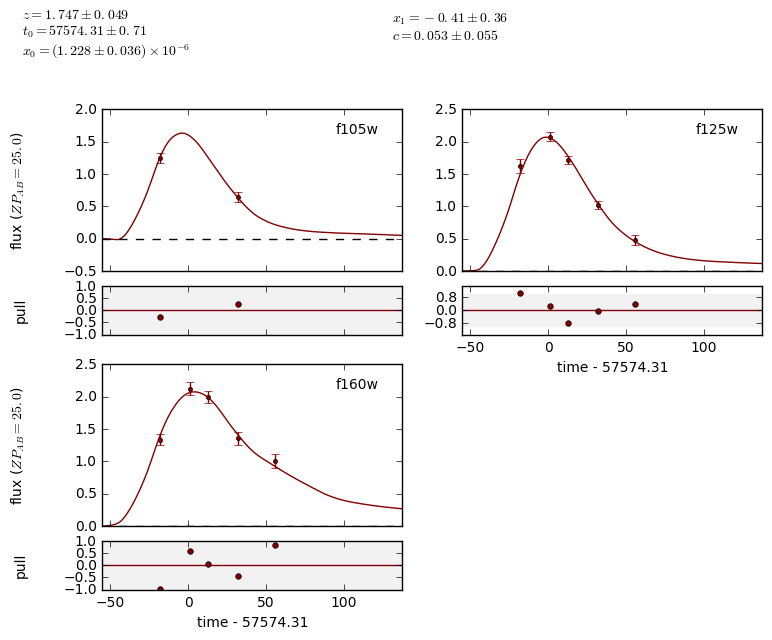

In [25]:
res2,fit2=sncosmo.fit_lc(data2,model,['z','t0', 'x0', 'x1', 'c'], bounds={'z':(1.3,2.2)})
sncosmo.plot_lc(data2,model=fit2, errors=res2.errors)

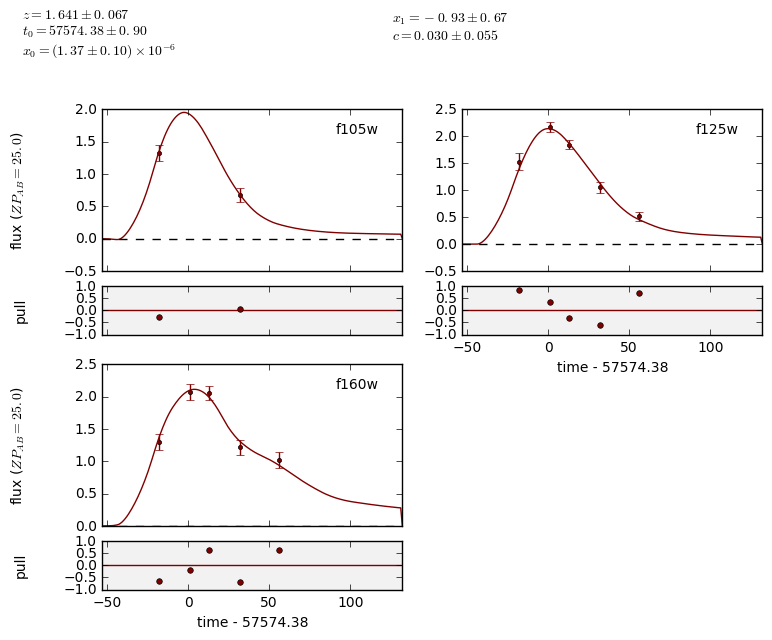

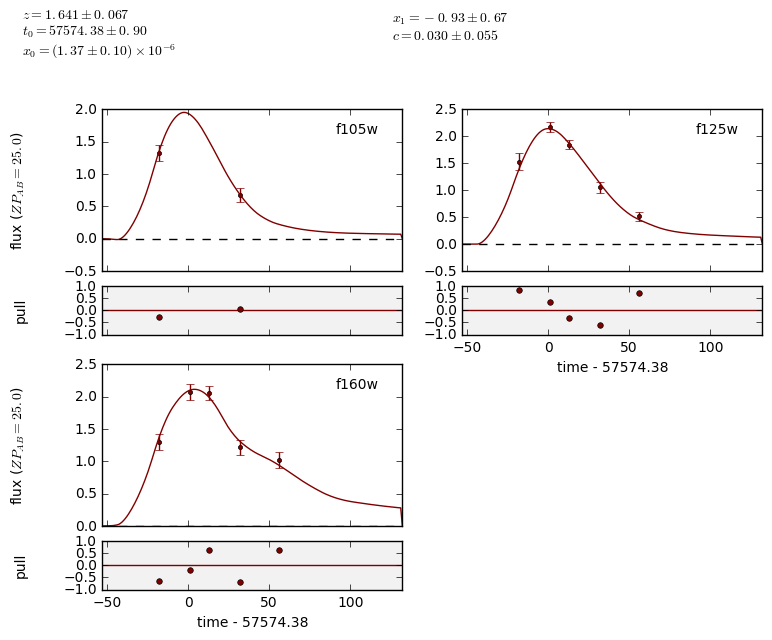

In [17]:
res3,fit3=sncosmo.fit_lc(data3,model,['z','t0', 'x0', 'x1', 'c'], bounds={'z':(1.3,2.2)})
sncosmo.plot_lc(data3,model=fit3, errors=res3.errors)

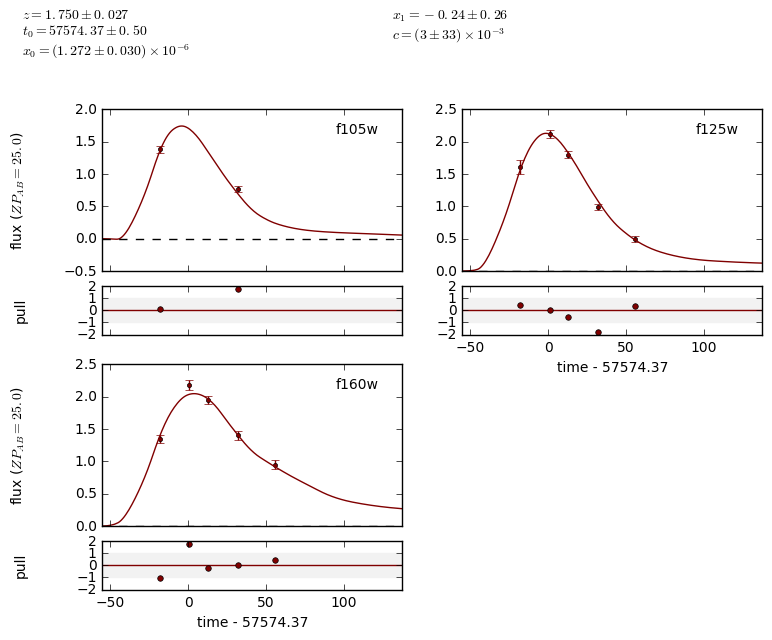

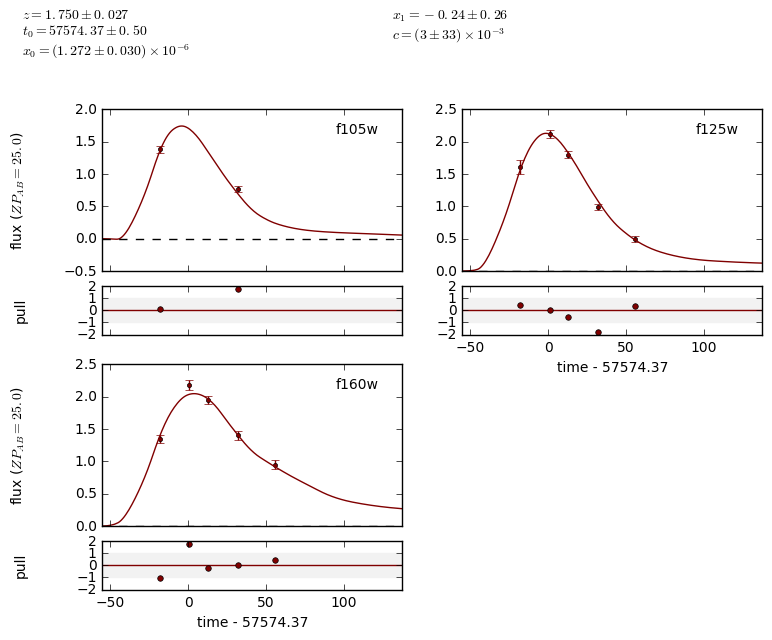

In [18]:
res4,fit4=sncosmo.fit_lc(datap,model,['z','t0', 'x0', 'x1', 'c'], bounds={'z':(1.3,2.2)})
sncosmo.plot_lc(datap,model=fit4, errors=res4.errors)

In [19]:
res1.chisq

10.388059026706301

In [ ]:
#Compute chi squared for each fit 

In [20]:
res2.chisq

4.331168254983149

In [21]:
res3.chisq

3.626168515940569

In [22]:
res4.chisq

11.277202309765219

<Container object of 3 artists>

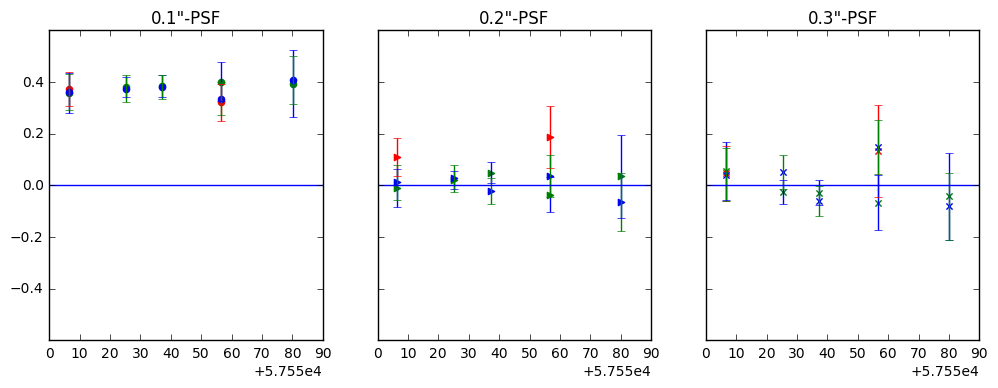

In [27]:
f, ((ax1), (ax2), (ax3)) = pl.subplots(1, 3, sharex='col', sharey='row',figsize=(12, 4))
ax1.scatter(F105W01["MJD"], F105W01["MAG"]-F105WA['MAG'], color='r', marker='o', label='F105W,0.1"-PSF')
ax1.set_title('0.1"-PSF')
ax2.set_title('0.2"-PSF')
ax3.set_title('0.3"-PSF')
ax1.set_ylim([-0.6,0.6])
ax1.axhline()
ax2.axhline()
ax3.axhline()
ax2.scatter(F105W02["MJD"], F105W02["MAG"]-F105WA['MAG'], color='r', marker='>', label='F105W,0.2"-PSF')
ax3.scatter(F105W03["MJD"], F105W03["MAG"]-F105WA['MAG'], color='r', marker='x', label='F105W')
ax1.scatter(F125W01["MJD"], F125W01["MAG"]-F125WA['MAG'], color='g', marker='o', label='F125W,0.1"-PSF')
ax2.scatter(F125W02["MJD"], F125W02["MAG"]-F125WA['MAG'], color='g', marker='>', label='F125W,0.2"-PSF')
ax3.scatter(F125W03["MJD"], F125W03["MAG"]-F125WA['MAG'], color='g', marker='x', label='F125W')
ax1.scatter(F160W01["MJD"], F160W01["MAG"]-F160WA['MAG'], color='b', marker='o', label='F160W,0.1"-PSF')
ax2.scatter(F160W02["MJD"], F160W02["MAG"]-F160WA['MAG'], color='b', marker='>', label='F160W,0.2"-PSF')
ax3.scatter(F160W03["MJD"], F160W03["MAG"]-F160WA['MAG'], color='b', marker='x', label='F160W')
ax1.errorbar(x=F105W01['MJD'], y=F105W01['MAG']-F105WA['MAG'], xerr=None, yerr=F105W01["MAGERR"], fmt='none', ecolor='r')
ax1.errorbar(x=F125W01['MJD'], y=F125W01['MAG']-F125WA['MAG'], xerr=None, yerr=F125W01["MAGERR"], fmt='none', ecolor='b')
ax1.errorbar(x=F160W01['MJD'], y=F160W01['MAG']-F160WA['MAG'], xerr=None, yerr=F160W01["MAGERR"], fmt='none', ecolor='g')
ax2.errorbar(x=F105W02['MJD'], y=F105W02['MAG']-F105WA['MAG'], xerr=None, yerr=F105W02["MAGERR"], fmt='none', ecolor='r')
ax2.errorbar(x=F125W02['MJD'], y=F125W02['MAG']-F125WA['MAG'], xerr=None, yerr=F125W02["MAGERR"], fmt='none', ecolor='b')
ax2.errorbar(x=F160W02['MJD'], y=F160W02['MAG']-F160WA['MAG'], xerr=None, yerr=F160W02["MAGERR"], fmt='none', ecolor='g')
ax3.errorbar(x=F105W03['MJD'], y=F105W03['MAG']-F105WA['MAG'], xerr=None, yerr=F105W03["MAGERR"], fmt='none', ecolor='r')
ax3.errorbar(x=F125W03['MJD'], y=F125W03['MAG']-F125WA['MAG'], xerr=None, yerr=F125W03["MAGERR"], fmt='none', ecolor='b')
ax3.errorbar(x=F160W03['MJD'], y=F160W03['MAG']-F160WA['MAG'], xerr=None, yerr=F160W03["MAGERR"], fmt='none', ecolor='g')

In [27]:
#Subtracting PSF light curve from each aperture light curve to find the difference between them
#We expect them to jump around zero due to differences in error 